<a href="https://colab.research.google.com/github/ziedjouini/clustering/blob/main/3_1_ML_Clustering_K_means_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics  import silhouette_score

In [ ]:
link = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df_iris = pd.read_csv(link)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = df_iris.select_dtypes(include='number')
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = pd.DataFrame(df_iris['species'])
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


Entraîne ton modèle pour qu’il trouve 3 clusters à partir des 4 colonnes numériques.

In [ ]:
modelKM = KMeans(n_clusters=3)
modelKM.fit(X)

modelKM.cluster_centers_

y_kmeans3 = modelKM.fit_predict(X)
print(y_kmeans3)

modelKM.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


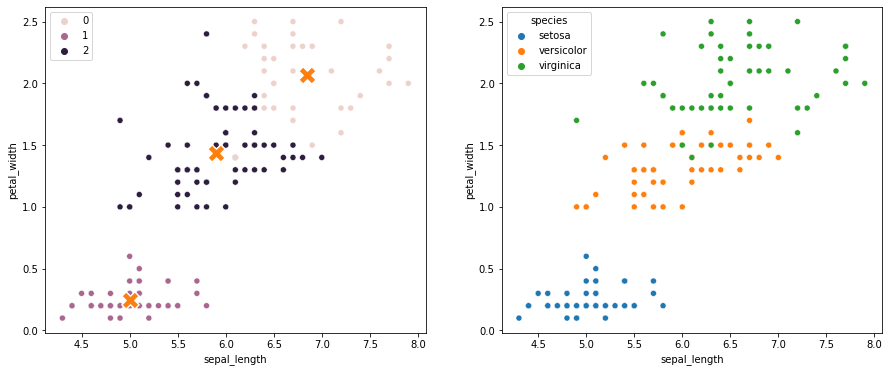

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(data=X, x="sepal_length", y="petal_width", hue = modelKM.labels_)
sns.scatterplot(modelKM.cluster_centers_[:,0],modelKM.cluster_centers_[:,3], marker = 'X', s = 300)
plt.subplot(122)
sns.scatterplot(data=df_iris, x="sepal_length", y="petal_width", hue = "species")

Entraine un autre modèle sur 2 clusters, puis affiche les mêmes graphiques

In [ ]:
modelKM = KMeans(n_clusters=2)
modelKM.fit(X)

modelKM.cluster_centers_

y_kmeans2 = modelKM.fit_predict(X)
print(y_kmeans2)

modelKM.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


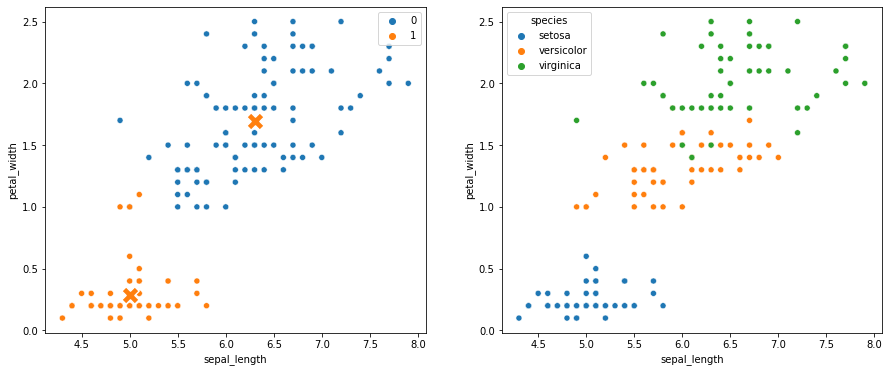

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(data=X, x="sepal_length", y="petal_width", hue = modelKM.labels_)
sns.scatterplot(modelKM.cluster_centers_[:,0],modelKM.cluster_centers_[:,3], marker = 'X', s = 300)
plt.subplot(122)
sns.scatterplot(data=df_iris, x="sepal_length", y="petal_width", hue = "species")

Entraine un autre modèle sur 4 clusters, puis affiche les mêmes graphiques

In [ ]:
modelKM = KMeans(n_clusters=4)
modelKM.fit(X)

modelKM.cluster_centers_

y_kmeans4 = modelKM.fit_predict(X)
print(y_kmeans4)

modelKM.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 0 3 0 0 2 0 0 0 3
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 3 3 0 0 0 3 0 0 0 3 3
 0 3]


array([[6.95      , 3.10666667, 5.86666667, 2.15333333],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.25714286, 2.86190476, 4.85      , 1.63333333]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


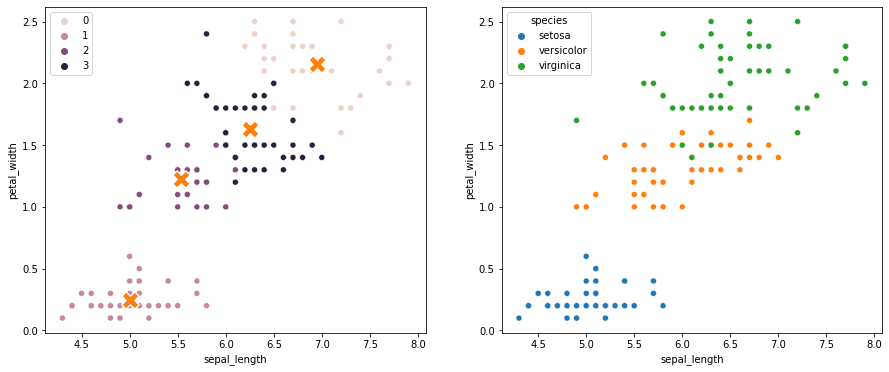

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(data=X, x="sepal_length", y="petal_width", hue = modelKM.labels_)
sns.scatterplot(modelKM.cluster_centers_[:,0],modelKM.cluster_centers_[:,3], marker = 'X', s = 300)
plt.subplot(122)
sns.scatterplot(data=df_iris, x="sepal_length", y="petal_width", hue = "species")

Évalue ton modèle en utilisant la méthode Elbow, entre 2 et 10 clusters, quel nombre cluster semble optimal ?

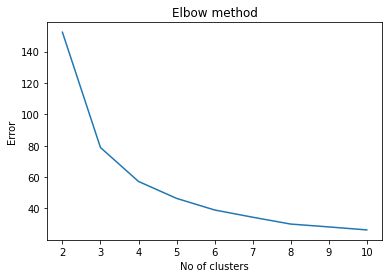

In [ ]:
Error =[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(2, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

3-4 semble optimal

Évalue ton modèle en utilisant la méthode Silhouette, entre 2 et 10 clusters, quel nombre de clusters semble optimal ? Et toi, visuellement, si tu ne savais pas qu'il y avait 3 espèces, tu en aurais trouvé combien ?

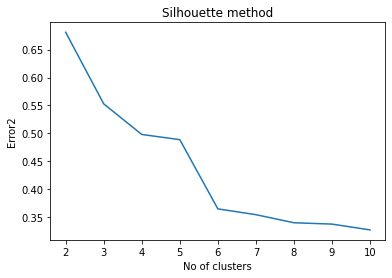

In [ ]:
# Ici, nous faisons une boucle pour afficher le score Silhouette
# pour un nombre de clusters entre 2 et 10

Error2 =[]
for k in range(2,11):
    modelKM = KMeans(n_clusters=k).fit(X)
    Error2.append(silhouette_score(X, modelKM.labels_))

plt.plot(range(2, 11), Error2)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Error2')
plt.show()

Le nombre optimal de clusters est 2 : 0.68